<a href="https://colab.research.google.com/github/ceccode/mlbookcamp/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md

In [126]:
import pandas as pd
import numpy as np

## Data preparation

Import dataset

In [127]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
df = pd.read_csv(url)


In [128]:
print(df.shape)

(48895, 16)


In [129]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [130]:
df = df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [131]:
print(df.shape)
df.head()

(48895, 8)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [132]:
df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Check missing values. If we chain a .sum() method on, instead of getting the total sum of missing values, we’re given a list of all the summations of each column:

In [133]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Median / 50th percentile

In [134]:
np.percentile(df['minimum_nights'], 50)

3.0

In [135]:
df['minimum_nights'].mean()

7.029962163820431

In [136]:
df['minimum_nights'].median()

3.0

Review per Month

In [137]:
min_reviews_per_month = df['reviews_per_month'].min()
max_reviews_per_month = df['reviews_per_month'].max()
mean_reviews_per_month = df['reviews_per_month'].mean()
median_reviews_per_month = df['reviews_per_month'].median()

min_reviews_per_month, max_reviews_per_month, mean_reviews_per_month, median_reviews_per_month

(0.01, 58.5, 1.3732214298586884, 0.72)

## Exploratory data analysis

In [138]:
import matplotlib as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

#It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object)
%matplotlib inline 


The first example is to create a basic histogram. It divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.

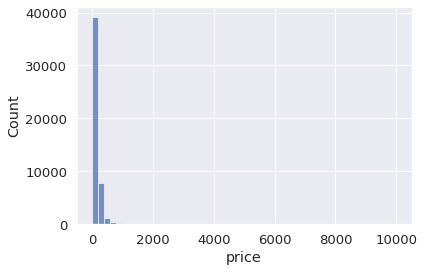

In [139]:
sns.histplot(df.price, bins=50)

The histogram has a long tail to the right which indicates there are few houses with very high prices

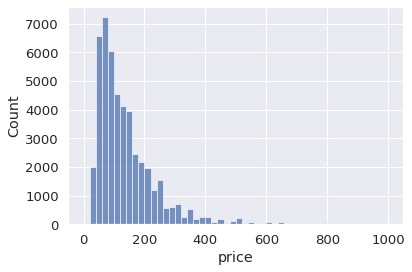

In [140]:
sns.histplot(df.price[df.price < 1000], bins=50)

In [141]:
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
median_price = df['price'].median()

min_price, max_price, mean_price, median_price

(0, 10000, 152.7206871868289, 106.0)

In [142]:
(df == 0).sum()

latitude                              0
longitude                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

Replace 0 values with 0.01

In [143]:
## Setting the new value
## df.loc[df.price == 0, 'price'] = 0.01

prices_logs = np.log1p(df.price)
prices_logs.head()

0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: price, dtype: float64

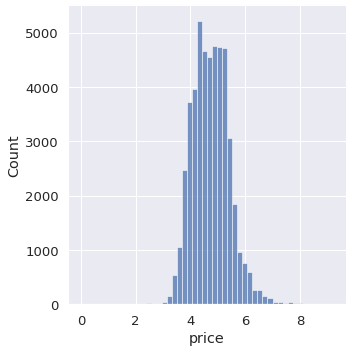

In [144]:
sns.displot(
  prices_logs,
  bins=50
)

The price is represented as the power of 10. We now have a better overview of the distribution of house prices.

## Setting up the validation framework

In [145]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [146]:
n

48895

In [147]:
n_train, n_val, n_test, n_train + n_val + n_test

(29337, 9779, 9779, 48895)

iloc Return a subset of data frame

In [148]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [149]:
#generate a sequence of numver
idx = np.arange(n)

In [150]:
np.random.seed(42)
np.random.shuffle(idx)

In [151]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [152]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [153]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

rest index after shuffle to restart from 0

In [154]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Apply the log transformation to the price variable using the np.log1p() function
and add y

In [155]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

Remove price from my dataset

In [156]:
del df_train['price']
del df_val['price']
del df_test['price']

In [157]:
len(y_train)

29337

## Linear regression

It tries to find out the best possible linear relationship between the input features and the target variable(y).

NOTE:

The target variable (price) is also known as an independent variable or label.
Input features (car) are also known as dependent variables.

question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [158]:

print(df_train.isna().sum())
print(len(df_train))

reviews_per_month_mean = df_train['reviews_per_month'].mean()
print(reviews_per_month_mean)

df_train_rpm_zero = df_train.copy(deep=True)
df_train_rpm_mean = df_train.copy(deep=True)

df_train_rpm_zero.reviews_per_month = df_train_rpm_zero.reviews_per_month.fillna(0)
df_train_rpm_mean.reviews_per_month = df_train_rpm_mean.reviews_per_month.fillna(reviews_per_month_mean)

print(df_train_rpm_zero.isna().sum())
print(df_train_rpm_mean.isna().sum())

print(df_train_rpm_zero.head())
print(df_train_rpm_zero.shape)

print(df_train_rpm_mean.head())
print(df_train_rpm_mean.shape)


latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64
29337
1.3685492094777056
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
   latitude  longitude  ...  calculated_host_listings_count  availability_365
0  40.64354  -73.97777  ...                               1               189
1  

In [159]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [160]:
X_train_zero = df_train_rpm_zero.values

w0, w = train_linear_regression(X_train_zero, y_train)
y_pred1 = w0 + X_train_zero.dot(w)
print(y_pred1)

X_train_mean = df_train_rpm_mean.values

w0, w = train_linear_regression(X_train_mean, y_train)
y_pred2 = w0 + X_train_mean.dot(w)
print(y_pred2)


[4.7827747  4.45947456 4.89702083 ... 4.82048871 4.86944871 4.61612559]
[4.7658961  4.45581848 4.89107725 ... 4.83526871 4.87768975 4.60682893]


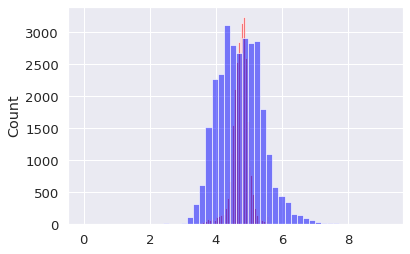

In [161]:
sns.histplot(y_pred1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

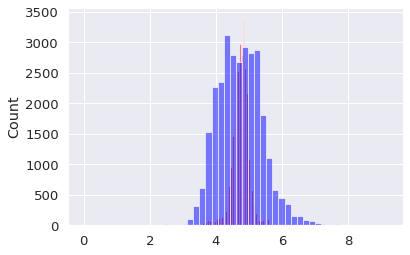

In [162]:
sns.histplot(y_pred2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [163]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

Evaluate the models and compare the RMSE of each option

In [164]:
rmse(y_train, y_pred1)

0.6428860484860432

In [165]:
rmse(y_train, y_pred2)

0.6429347474014223

In [166]:
round(rmse(y_train, y_pred1), 2)

0.64

In [167]:
round(rmse(y_train, y_pred2), 2)

0.64

In [168]:
base = ['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [169]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [170]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6430337788584176

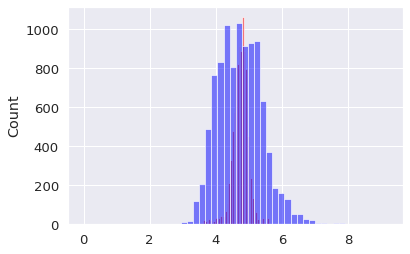

In [171]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)

Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [172]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [173]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.655752842747922

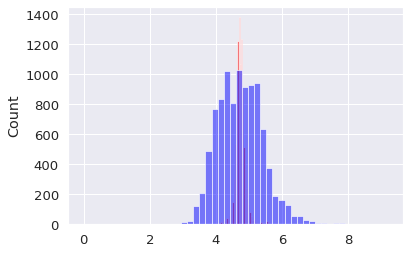

In [176]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

In [177]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score_rounded = round(score, 2)
    
    print(r, w0, score, score_rounded)

0.0 -419.91265807142094 0.6430337788584176 0.64
1e-06 -419.8627153336333 0.6430341157479255 0.64
0.0001 -414.97649233703777 0.6430723153561932 0.64
0.001 -375.27365241862066 0.6437669735361422 0.64
0.01 -191.78384049339815 0.655752842747922 0.66
0.1 -32.56256054966786 0.6773299642454972 0.68
1 -3.4992168354209157 0.6823116950156266 0.68
5 -0.7033623171188026 0.6827915727849295 0.68
10 -0.35127675921831375 0.6828430212097022 0.68


Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [178]:
def shuffle_data(seed):
  idx_s = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx_s)

  df_train_s = df.iloc[idx_s[:n_train]]
  df_val_s = df.iloc[idx_s[n_train:n_train+n_val]]
  df_test_s = df.iloc[idx_s[n_train+n_val:]]

  y_train_s = np.log1p(df_train_s.price.values)
  y_val_s = np.log1p(df_val_s.price.values)
  y_test_s = np.log1p(df_test_s.price.values)

  return df_train_s, df_val_s, df_test_s, y_train_s, y_val_s, y_test_s

In [179]:
scores = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_train_s, df_val_s, df_test_s, y_train_s, y_val_s, y_test_s = shuffle_data(r)

  X_train = prepare_X(df_train_s)
  w0, w = train_linear_regression_reg(X_train, y_train_s, 0.01)

  X_val = prepare_X(df_val_s)
  y_pred = w0 + X_val.dot(w)

  score = rmse(y_val_s, y_pred)
  print(score)
  scores.append(score)

0.6655456328066467
0.6593879931862249
0.6573318826974314
0.6491293996078492
0.6562386412595742
0.6411893930826074
0.6408149905216856
0.6619412283432514
0.661334695425393
0.6546902699312248


>Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [180]:
std = np.std(scores)
round(std, 3)

0.008

Question 6

In [181]:
df_train_final, df_val_final, df_test_final, y_train_final, y_val_final, y_test_final = shuffle_data(9)

df_full_train = pd.concat([df_train_final, df_val_final])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
X_full_train

array([[ 4.070423e+01, -7.391595e+01,  1.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.077115e+01, -7.392275e+01,  4.000000e+01, ...,  2.700000e-01,
         1.000000e+00,  2.070000e+02],
       [ 4.070401e+01, -7.400932e+01,  2.900000e+01, ...,  0.000000e+00,
         9.600000e+01,  1.000000e+00],
       ...,
       [ 4.072982e+01, -7.398593e+01,  2.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071969e+01, -7.395620e+01,  1.000000e+00, ...,  2.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.066949e+01, -7.392172e+01,  1.000000e+00, ...,  1.910000e+00,
         2.000000e+00,  3.230000e+02]])

In [186]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.56434819,
       4.94875989])

In [183]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [184]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.7039823118671722